# Storytelling Data Visualization on Exchange Rates


## Introducing the Dataset

This project will be focused on explanatory data visualization. The dataset we'll use describes Euro daily exchange rates between 1999 and 2021. 

DataQuest put together the data set and made it available on [Kaggle](https://www.kaggle.com/lsind18/euro-exchange-daily-rates-19992020) — the data source is the European Central Bank. Note that the dataset gets regular updates — we downloaded it on January 2021.

Let's start by reading in the dataset.

### Reading in the data

In [1]:
import pandas as pd

exchange_rates = pd.read_csv('euro-daily-hist_1999_2020.csv')
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

In [2]:
exchange_rates.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-01-08,1.5758,1.9558,6.5748,1.5543,1.0827,7.9184,NaN,26.163,7.4369,...,4.8708,90.8000,10.0510,1.6228,NaN,NaN,36.8480,9.0146,1.2250,18.7212
1,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,NaN,26.147,7.4392,...,4.8712,91.2000,10.0575,1.6253,NaN,NaN,36.8590,8.9987,1.2276,18.7919
2,2021-01-06,1.5824,1.9558,6.5119,1.5640,1.0821,7.9653,NaN,26.145,7.4393,...,4.8720,90.8175,10.0653,1.6246,NaN,NaN,36.9210,9.0554,1.2338,18.5123
3,2021-01-05,1.5927,1.9558,6.5517,1.5651,1.0803,7.9315,NaN,26.227,7.4387,...,4.8721,91.6715,10.0570,1.6180,NaN,NaN,36.7760,9.0694,1.2271,18.4194
4,2021-01-04,1.5928,1.9558,6.3241,1.5621,1.0811,7.9484,NaN,26.141,7.4379,...,4.8713,90.3420,10.0895,1.6198,NaN,NaN,36.7280,9.0579,1.2296,17.9214


## Data Cleaning

Before we start creating data visualizations, we'll need to do a bit of data cleaning.

Our focus in the guided part of the project will be on the exchange rate between the euro and the American dollar. 

In [3]:
# We rename the [US dollar ] and Period\Unit: columns 
# to something easier to type — US_dollar and Time.
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                      inplace=True)

# We change the Time column to a datetime data type
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])

# We sort the values by Time in ascending order
exchange_rates.sort_values('Time', inplace=True)

# We reset the index (and drop the initial index).
exchange_rates.reset_index(drop=True, inplace=True)

In [4]:
# Isolating the Time and US_dollar columns 
euro_to_dollar = exchange_rates[['Time', 'US_dollar']].copy()

# Checking values in US_dollar column
euro_to_dollar['US_dollar'].value_counts() #62 - characters

-         62
1.2276     9
1.1215     8
1.1305     7
1.2713     6
          ..
1.0029     1
1.5693     1
1.2164     1
0.9164     1
1.2450     1
Name: US_dollar, Length: 3528, dtype: int64

### Cleaning Column
There are 62 '-' characters in the US_dollar column.
* We will now drop the rows where the '-' character appears in the US_dollar column. 
* And after that we will convert the US_dollar column to a float type.

In [5]:
# Dropping rows where the '-' character appears
euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar'] != '-']

# Converting to a float type
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype('float')

## Rolling Mean

Now that we're finished cleaning the data, we'll generate a line plot to visualize the evolution of the euro-dollar exchange rate.

Because we do not want to show the daily variation between exchange rates on the graph. We want to hide those and show only the long-term trends, by using the **rolling mean** (also known as the moving average). We can calculate the mean for each day using the pandas.Series.rolling().mean() method — the only exception is the first day, which doesn't have a previous day.

We call the number of days used in the calculation the **rolling window** (or moving window). If the rolling window is three, then we calculate the mean between the value of the current day and the values of the previous two days.

We will now calculate the rolling means for the `US_dollar` column using a moving windows of 30 days.

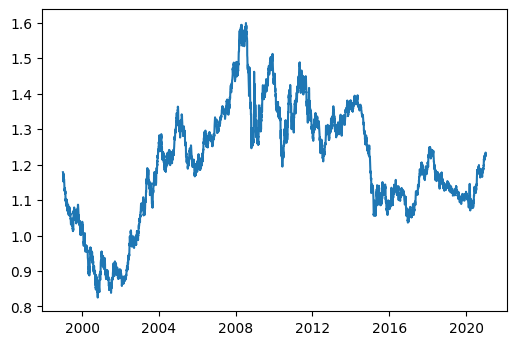

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline 

# Creating a line graph
plt.plot(euro_to_dollar['Time'],
         euro_to_dollar['US_dollar'])
plt.show()

# Calculating the rolling means
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()

In [7]:
print(euro_to_dollar['rolling_mean'])

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
5694    1.211170
5695    1.212530
5696    1.213987
5697    1.215357
5698    1.216557
Name: rolling_mean, Length: 5637, dtype: float64


## Visualizing How The Euro-Dollar Rate Has changed

In this section I will show how the euro-dollar rate has changed during the coronavirus pandemic. I will show the 2020 data and the 2016-2019 data as a baseline. And visualize this by using a line plot.

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline 

print("\n\x1b[1mValues Time Column\x1b[0m")
print(exchange_rates['Time'])

# Extracting years from the Time column
years = euro_to_dollar['Time'].dt.year

print("\n\x1b[1mExtracted Years\x1b[0m")
print(years)

# Extracting the 2016-2019 data with boolean masks
mask1 = euro_to_dollar['Time'].dt.year > 2015 
mask2 = euro_to_dollar['Time'].dt.year < 2020
data_2016_2019 = euro_to_dollar[(mask1) & (mask2)]

# Extracting the 2020 data with boolean masks
mask3 = euro_to_dollar['Time'].dt.year == 2020
data_2020 = euro_to_dollar.loc[(mask3)]


Values Time Column
0      1999-01-04
1      1999-01-05
2      1999-01-06
3      1999-01-07
4      1999-01-08
          ...    
5694   2021-01-04
5695   2021-01-05
5696   2021-01-06
5697   2021-01-07
5698   2021-01-08
Name: Time, Length: 5699, dtype: datetime64[ns]

Extracted Years
0       1999
1       1999
2       1999
3       1999
4       1999
        ... 
5694    2021
5695    2021
5696    2021
5697    2021
5698    2021
Name: Time, Length: 5637, dtype: int64


In [9]:
data_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 257 entries, 5437 to 5693
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Time          257 non-null    datetime64[ns]
 1   US_dollar     257 non-null    float64       
 2   rolling_mean  257 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 8.0 KB


In [10]:
# Filtering time period with European first cases
euro_to_dollar_covid_first_cases = euro_to_dollar.copy()[(euro_to_dollar["Time"] >= "2020-02-01" ) & (euro_to_dollar["Time"] <= "2020-04-30")]

print("\n\x1b[1mValues Euro to Dollar First Cases\x1b[0m\n")
print(euro_to_dollar_covid_first_cases.info())

# Filtering time period with European second spike cases
euro_to_dollar_covid_second_cases = euro_to_dollar.copy()[(euro_to_dollar["Time"] >= "2020-08-01" ) & (euro_to_dollar["Time"] <= "2020-12-05")]
print("\n\x1b[1mValues Euro to Dollar Second Cases\x1b[0m\n")
print(euro_to_dollar_covid_second_cases.info())


Values Euro to Dollar First Cases

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 5459 to 5520
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Time          62 non-null     datetime64[ns]
 1   US_dollar     62 non-null     float64       
 2   rolling_mean  62 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 1.9 KB
None

Values Euro to Dollar Second Cases

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 5586 to 5675
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Time          90 non-null     datetime64[ns]
 1   US_dollar     90 non-null     float64       
 2   rolling_mean  90 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 2.8 KB
None


## Coding the Graph

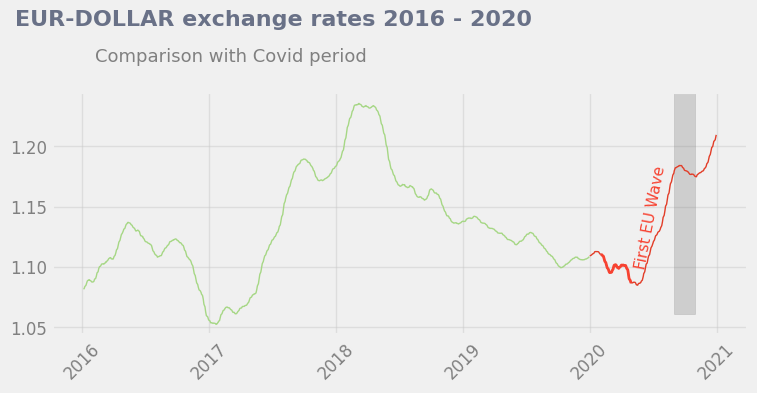

Text(737620, 1.19, 'Second wave EU cases')

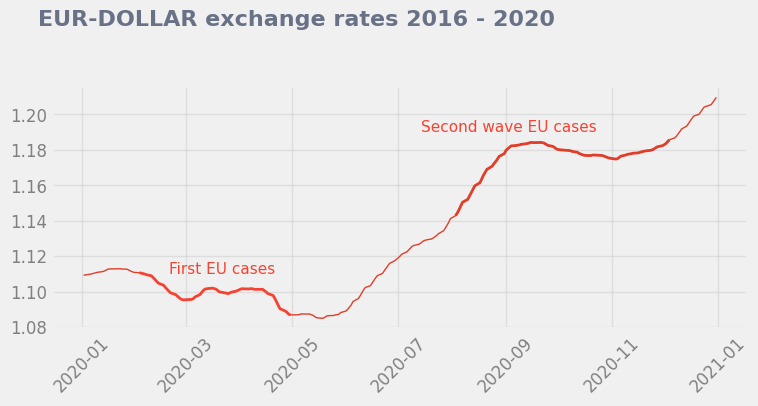

In [11]:
import matplotlib.style as style
from datetime import datetime
from matplotlib.dates import date2num
import numpy
style.use('fivethirtyeight')

# adding plots
fig, ax = plt.subplots(figsize=(8,3))

ax.plot(data_2016_2019['Time'],
         data_2016_2019['rolling_mean'],
        linewidth=1, color='#A6D785')

# highlighting the 2020 period
ax.plot(data_2020['Time'],
       data_2020['rolling_mean'],
       lw=1, color='#e23d28')

# Highlighting the peak of high exchange rate
ax.axvspan(xmin=737669, xmax=737730, ymin=0.09, alpha=0.3, color='grey')

## other approach with using datetime values to insert grey rectangle
## ax.axvspan(date2num(datetime(2020,9,10)), date2num(datetime(2020,10,1)),
##          label="March", color='grey', alpha=0.3)

# Highlighting the first months of the pandemic
ax.plot(euro_to_dollar_covid_first_cases["Time"],
        euro_to_dollar_covid_first_cases["rolling_mean"],
        linewidth=2, color="#F74231")

ax.grid(alpha=0.5)
ax.tick_params(axis="x", rotation=45, colors="gray", labelsize=12)
ax.tick_params(axis="y", colors="gray", labelsize=12 )

# Adding explaining texts
ax.text(737550, 1.10, "First EU Wave", rotation=79, color="#F74231", size=11)

# Adding title & subtitle
ax.text(735770, 1.3, "EUR-DOLLAR exchange rates 2016 - 2020", weight="bold", color="#697187", size=16)
ax.text(736000, 1.27, "Comparison with Covid period", color="gray", size=13)
plt.show()

# adding plot
fig, ax = plt.subplots(figsize=(8,3))
ax.plot(data_2020['Time'],
       data_2020['rolling_mean'],
       lw=1, color='#e23d28')

# Highlighting the first months of the pandemic
ax.plot(euro_to_dollar_covid_first_cases["Time"],
        euro_to_dollar_covid_first_cases["rolling_mean"],
        linewidth=2, color="#F74231")
ax.grid(alpha=0.5)
ax.tick_params(axis="x", rotation=45, colors="gray", labelsize=12)
ax.tick_params(axis="y", colors="gray", labelsize=12 )


# Adding title & subtitle
ax.text(737400, 1.25, "EUR-DOLLAR exchange rates 2016 - 2020", weight="bold", color="#697187", size=16)


# Adding explaining texts
ax.text(737475, 1.11, "First EU cases", color="#F74231", size=11)

ax.plot(euro_to_dollar_covid_second_cases["Time"],
        euro_to_dollar_covid_second_cases["rolling_mean"],
        linewidth=2, color="#e23d28")

# Adding explaining texts
ax.text(737620, 1.19, "Second wave EU cases", color="#F74231", size=11)